In [1]:
# se_f = "~/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/enrichment/annotation_clones/SE.rds"
# outdir = "~/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/enrichment/annotation_clones/DE_large"
# n_donors = 4

se_f = "/data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/annotation_clones/SE.rds"
outdir = "/data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/annotation_clones/DE_large"
n_donors = 2



# If more than 2 clones pass the cdf_thresh, use that, o.w use n_top_clones
cdf_thresh = 0.5
n_top_clones = 3

min_pct = 0.01
use_latent_vars = FALSE
genome = "/data/Mito_Trace/data/external/GRCh38_MT_blacklist/fasta/genome.fa"
cores=16
utils_script <- "/data/Mito_Trace/R_scripts/seurat_utils.R"

In [2]:
if (use_latent_vars){
    latent.vars = "peaks_depth"
}else{
    latent.vars=NULL
}

In [3]:
source(utils_script)

Attaching SeuratObject



In [4]:
library(Seurat)
library(Signac)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)
plan("multiprocess", workers = cores)
#options(future.globals.maxSize = 50000 * 1024^2) # for 50 Gb RAM
options(future.globals.maxSize = 8000 * 1024^2)
library("ComplexHeatmap")


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“Strategy 'multiprocess' is deprecated in future (>= 1.20.0). Instead, explicitly specify either 'multisession' or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”
Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export sta

## Import seurat object

In [5]:
if (file.exists(file.path(outdir, "se.chromvar.rds"))){
    print("Loading se with chromvar")
    se <- readRDS(file=file.path(outdir, "se.chromvar.rds"))    
}else{
    print("Running chromvar")
    se = readRDS(se_f)
#     source("~/data/Projects/Mito_Trace/R_scripts/addPWM.R")
    se <- get.pwm(se, genome=genome)
    saveRDS(object=se, file=file.path(outdir, "se.chromvar.rds"))    
}

# print("Running chromvar")
# se = readRDS(se_f)
# se <- get.pwm(se, genome=genome)
# saveRDS(object=se, file=file.path(outdir, "se.chromvar.rds"))




[1] "Loading se with chromvar"


In [6]:
counts <- se[[]] %>%
          group_by(condition, donor, lineage, name) %>%
          summarize(size=n()) %>% filter(!name=="None")
counts

`summarise()` has grouped output by 'condition', 'donor', 'lineage'. You can override using the `.groups` argument.



condition,donor,lineage,name,size
<fct>,<fct>,<fct>,<fct>,<int>
post,0,0,0_0,418
post,0,1,0_1,7
post,0,2,0_2,41
post,0,3,0_3,145
post,0,4,0_4,36
post,0,5,0_5,15
post,0,6,0_6,15
post,0,7,0_7,691
post,0,8,0_8,7


In [7]:
counts.norm <- counts %>% group_by(condition, donor) %>% mutate(total=sum(size)) %>% ungroup() %>% mutate(norm=size/total)

counts.norm 

condition,donor,lineage,name,size,total,norm
<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>
post,0,0,0_0,418,3177,0.1315706641
post,0,1,0_1,7,3177,0.0022033365
post,0,2,0_2,41,3177,0.0129052565
post,0,3,0_3,145,3177,0.0456405414
post,0,4,0_4,36,3177,0.0113314448
post,0,5,0_5,15,3177,0.0047214353
post,0,6,0_6,15,3177,0.0047214353
post,0,7,0_7,691,3177,0.2175007869
post,0,8,0_8,7,3177,0.0022033365


In [8]:
counts.norm.sizes = counts.norm[order(counts.norm[,"norm"], decreasing=T),]
counts.norm.sizes

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


condition,donor,lineage,name,size,total,norm
<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>
post,0,18,0_18,1699,3177,0.53478124
pre,0,18,0_18,1093,2076,0.52649326
pre,0,7,0_7,481,2076,0.23169557
post,0,7,0_7,691,3177,0.21750079
post,1,1,1_1,567,2987,0.18982256
pre,1,1,1_1,295,1638,0.18009768
post,1,8,1_8,520,2987,0.17408771
pre,1,8,1_8,275,1638,0.16788767
pre,1,17,1_17,250,1638,0.15262515


In [9]:
clone.sizes <- counts.norm.sizes %>% 
               group_by(donor,lineage) %>% 
               summarize(norm.total=sum(norm), total=sum(size)) %>% 
               arrange(desc(norm.total)) %>% 
               mutate(name=factor(paste0(donor,"_", lineage)))


clone.sizes

`summarise()` has grouped output by 'donor'. You can override using the `.groups` argument.



donor,lineage,norm.total,total,name
<fct>,<fct>,<dbl>,<int>,<fct>
0,18,1.0612744964,2792,0_18
0,7,0.4491963553,1172,0_7
1,1,0.3699202445,862,1_1
1,8,0.3419753813,795,1_8
1,17,0.2962475162,679,1_17
1,7,0.2756482813,629,1_7
0,0,0.2650003366,695,0_0
1,9,0.2597554400,612,1_9
1,16,0.2433706419,568,1_16


In [10]:
clone.sizes <- clone.sizes %>% group_by(donor) %>% arrange(donor, desc(norm.total)) %>% 
                               mutate(cdf.norm=cumsum(norm.total)/2, cdf =cumsum(total),
                                      index=1:n()) %>% 
                               ungroup %>% arrange(donor, desc(norm.total)) 
#head(clone.sizes,100)

head(clone.sizes)

donor,lineage,norm.total,total,name,cdf.norm,cdf,index
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>
0,18,1.06127450,2792,0_18,0.5306372,2792,1
0,7,0.44919636,1172,0_7,0.7552354,3964,2
0,0,0.26500034,695,0_0,0.8877356,4659,3
0,3,0.07502397,206,0_3,0.9252476,4865,4
0,12,0.04724847,122,0_12,0.9488718,4987,5
0,2,0.02639273,69,0_2,0.9620682,5056,6


Saving 6.67 x 6.67 in image



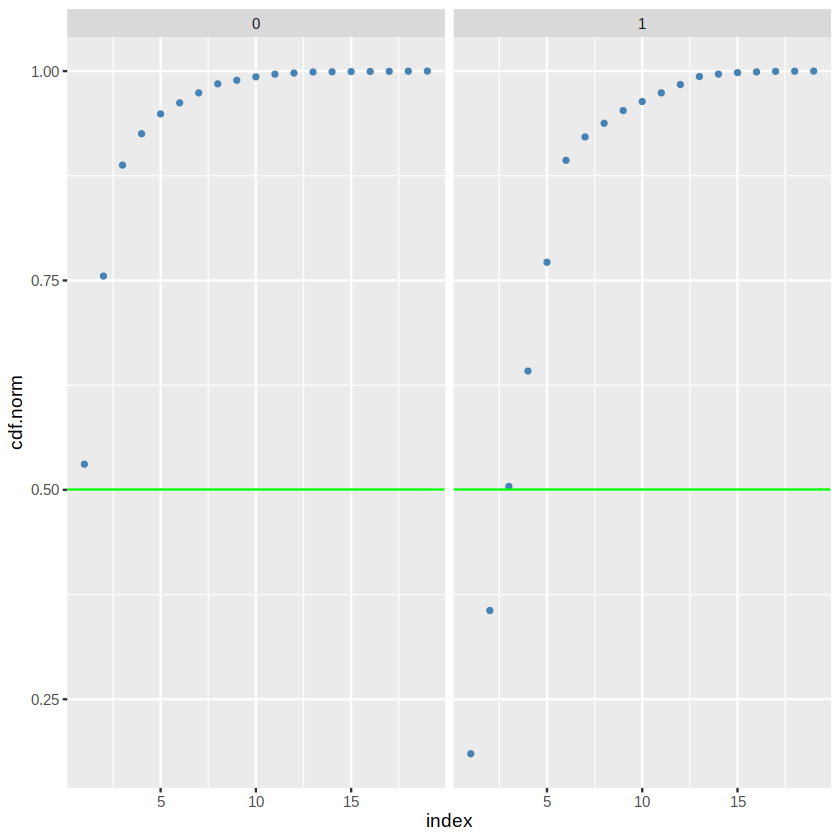

In [11]:
p <- ggplot(data = clone.sizes, aes(index, cdf.norm)) +
  geom_point(color = "steelblue", size = 1) +
  facet_wrap(~ donor) 

p <- p + geom_hline(yintercept=cdf_thresh, color='green') 
ggsave(file.path(outdir, "clones.cdf.png"))
p


In [12]:
min(clone.sizes$cdf.norm)
max(clone.sizes$cdf.norm)

[1] 0.1849601

[1] 1

In [13]:
large.clones = dplyr::bind_rows(lapply(0:(n_donors-1), 
                                       FUN=get.top.clones, clones=clone.sizes, cdf_thresh=cdf_thresh, n_top_clones=n_top_clones))

#large.clones <- clone.sizes %>% filter(cdf.norm<cdf_thresh)
#large.clones <- check.if.one.clone(large.clones, clone.sizes, n_top_clones)
#large.clones$name = factor(paste0(large.clones$donor,"_", large.clones$lineage))
write.csv(large.clones, 
          file=file.path(outdir, "large_clones.csv"), quote=F)

large.clones

[1] "cdf thresh clones"
[1] 0 8


Warning message in if (dim(cdf.clones[1]) > n_top_clones) {:
“the condition has length > 1 and only the first element will be used”


[1] "cdf thresh clones"
[1] 2 8


Warning message in if (dim(cdf.clones[1]) > n_top_clones) {:
“the condition has length > 1 and only the first element will be used”


donor,lineage,norm.total,total,name,cdf.norm,cdf,index
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>
0,18,1.0612745,2792,0_18,0.5306372,2792,1
0,7,0.4491964,1172,0_7,0.7552354,3964,2
0,0,0.2650003,695,0_0,0.8877356,4659,3
1,1,0.3699202,862,1_1,0.1849601,862,1
1,8,0.3419754,795,1_8,0.3559478,1657,2
1,17,0.2962475,679,1_17,0.5040716,2336,3


Saving 6.67 x 6.67 in image



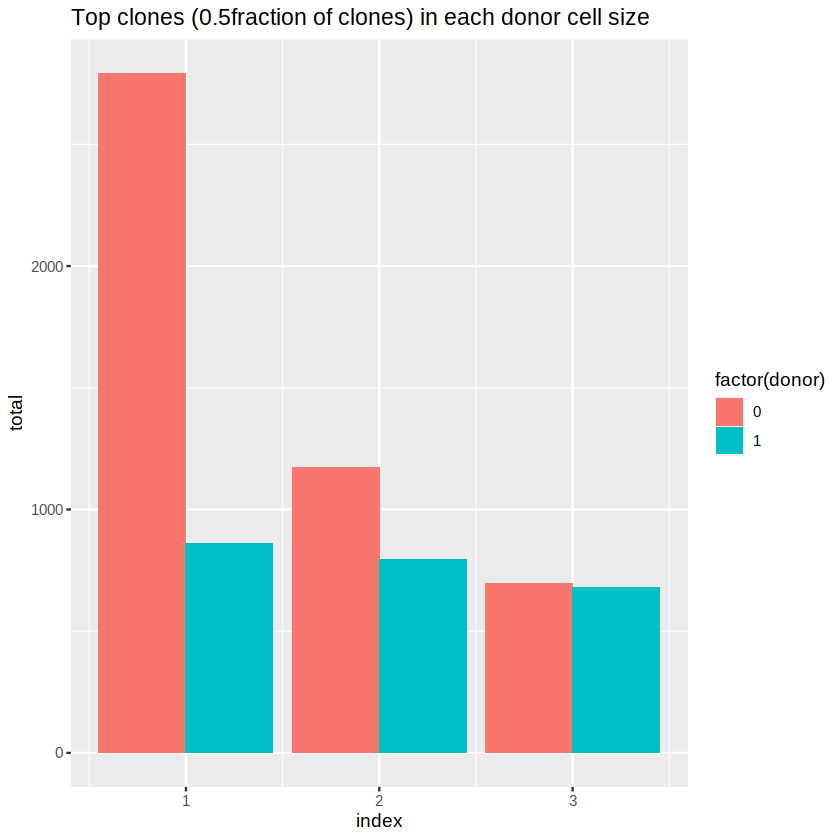

In [14]:
ggplot(data=large.clones, aes(x=index,y=total, fill = factor(donor))) + 
        geom_col(position='dodge') +
       ggtitle(paste0("Top clones (", cdf_thresh,
                      "fraction of clones) in each donor cell size"))

ggsave(file.path(outdir, "topClonesSize.png"))

## TF DE

## Filter se for cells in the large clones

In [15]:
large.clones

donor,lineage,norm.total,total,name,cdf.norm,cdf,index
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>
0,18,1.0612745,2792,0_18,0.5306372,2792,1
0,7,0.4491964,1172,0_7,0.7552354,3964,2
0,0,0.2650003,695,0_0,0.8877356,4659,3
1,1,0.3699202,862,1_1,0.1849601,862,1
1,8,0.3419754,795,1_8,0.3559478,1657,2
1,17,0.2962475,679,1_17,0.5040716,2336,3


In [16]:
se <- subset(se, subset= name %in% factor(large.clones$name))
se

An object of class Seurat 
99506 features across 6995 samples within 4 assays 
Active assay: chromvarnames (633 features, 0 variable features)
 3 other assays present: ATAC, RNA, chromvar
 2 dimensional reductions calculated: integrated_lsi, umap

In [17]:
saveRDS(object=se, file=file.path(outdir, "se.clonesfilt.rds"))    

## Run DE

In [18]:
# for (d in 0:(n_donors-1)){
#     print('donor')
#     print(d)
#     curr.outdir <- file.path(outdir, paste0("donor", d, "_TF"))
#     dir.create(curr.outdir)
#     donor.large.clones <- large.clones %>% filter(donor==d)
#     clones.filt.ids <- sort(donor.large.clones$lineage)
#     print('clones')
#     print(clones.filt.ids)
#     print(length(clones.filt.ids))
#     se.filt <- subset(se, subset = (donor==d) & (lineage %in% donor.large.clones$lineage))
#     Idents(se.filt) <- se.filt$lineage  
#     print('se.filt')
#     print(dim(se.filt[[]]))

#     pairs = combn(clones.filt.ids,2)
#     for (i in 1:dim(combn(clones.filt.ids,2))[2]){
#         DefaultAssay(se.filt) <- "chromvarnames"
#         print(pairs[,i])
#         try({
#             print(paste("clones", i))
#             a = pairs[1,i]
#             b = pairs[2,i]
#             da <- FindMarkers(
#               object = se.filt,
#               ident.1 = a,
#               ident.2 = b,
#               only.pos = FALSE,
#               mean.fxn = rowMeans,
#               logfc.threshold = 0.1,
#               min.pct = min_pct,
#               latent.vars=latent.vars,
#               fc.name = "avg_diff")
#             da$p_val_adj_BH <- stats::p.adjust(da$p_val, method = "BH", n = length(da$p_val))
#             write.csv(da, 
#                       file=file.path(curr.outdir, paste0("clones_",a,"__", b,".DE.TF.csv")))
#             gally <- GGally::ggpairs(da[,c("p_val", "p_val_adj")], aes(alpha = 0.4))
#             ggsave(object=gally, file=file.path(curr.outdir, paste0("clones_",a,"__", b,".DE.TF.pvalHist.png")))
#             #plotDE(se, da, c, clust_outdir)
#             # Save motifs
#             DefaultAssay(se.filt) <- "ATAC"
#             raw.ids <- names(Motifs(se.filt)@motif.names)
#             rownames(curr.tf.da) <- sapply((curr.tf.da$X), function(x){raw.ids[match(x, Motifs(se.filt)@motif.names)]})
#             m <- MotifPlot(
#               object = se.filt,
#               motifs = head(rownames(curr.tf.da)),
#               assay = 'ATAC'
#             )
#             ggsave(plot=m, 
#                        file=file.path(curr.outdir, paste0("clones_",a,"__", b,".DE.TF.motif.top.png")))




#     })
#         }
#     }